## Exploratory Data Anaysis (EDA)

#### Performing EDA on two datasets:
1) American Community Survey (ACS) 2018 Data for Deschutes, Multnomah, Marion, Polk, and Lane Counties in Oregon. Smallest unit 
   of analysis is the block group level.

2) Transaction History data for Shoemill, for the last five years at all store locations. NOTE: This sample only includes
   customers that opted in for electronic receipts.

In [19]:
# Import packages

import pandas as pd #pandas is the package we're going to be using the most of!
import matplotlib.pyplot as plt #matplotlib is a great plotting library
plt.style.use('ggplot') #this adds a customised style to my plots
%matplotlib inline 

import seaborn as sns
sns.set(color_codes=True)

Begin with ACS Data

In [6]:
# Bring in data

acs = pd.read_csv('acscln.csv')

In [7]:
acs.head()

,Unnamed: 0,unwt_tot_pop_count,tot_housing,tot_sex_age,tot_male,tot_female,tot_med_age,med_age_male,med_age_female,tot_pop,hh_inc,blkgrp,tract,cnty
0,0,50.0,20.0,874,586,288,32.9,31.0,57.0,874,374,Block Group 1,Census Tract 16,Deschutes County
1,1,100.0,50.0,2271,1089,1182,33.5,28.1,36.8,2271,979,Block Group 2,Census Tract 16,Deschutes County
2,2,150.0,60.0,3118,1374,1744,40.5,42.3,37.8,3118,1269,Block Group 1,Census Tract 17,Deschutes County
3,3,100.0,50.0,2370,1201,1169,37.2,34.3,39.7,2370,1026,Block Group 2,Census Tract 17,Deschutes County
4,4,90.0,40.0,2228,952,1276,32.8,37.6,30.2,2228,790,Block Group 4,Census Tract 17,Deschutes County


In [8]:
acs.tail(10)

,Unnamed: 0,unwt_tot_pop_count,tot_housing,tot_sex_age,tot_male,tot_female,tot_med_age,med_age_male,med_age_female,tot_pop,hh_inc,blkgrp,tract,cnty
1087,1087,100.0,50.0,924,485,439,36.6,32.5,44.4,924,321,Block Group 1,Census Tract 37.02,Multnomah County
1088,1088,100.0,50.0,1281,633,648,36.8,39.2,35.2,1281,588,Block Group 3,Census Tract 38.01,Multnomah County
1089,1089,150.0,60.0,1921,1006,915,32.0,30.9,35.1,1921,682,Block Group 1,Census Tract 42,Multnomah County
1090,1090,80.0,50.0,1710,1085,625,33.2,33.3,33.0,1710,1049,Block Group 3,Census Tract 47,Multnomah County
1091,1091,60.0,40.0,1049,589,460,30.7,35.1,30.1,1049,701,Block Group 2,Census Tract 48,Multnomah County
1092,1092,100.0,50.0,1049,571,478,44.9,45.6,42.9,1049,441,Block Group 2,Census Tract 67.02,Multnomah County
1093,1093,90.0,40.0,1037,416,621,46.8,52.0,45.1,1037,397,Block Group 2,Census Tract 105,Multnomah County
1094,1094,100.0,60.0,957,413,544,58.4,42.3,68.1,957,522,Block Group 1,Census Tract 82.01,Multnomah County
1095,1095,100.0,40.0,1189,593,596,32.9,32.6,35.5,1189,433,Block Group 2,Census Tract 32,Multnomah County
1096,1096,100.0,50.0,1424,615,809,31.9,29.9,33.6,1424,543,Block Group 3,Census Tract 4.02,Multnomah County


In [10]:
# Take a look at columns and drop obnoxius "Unnamed 0" column

acs.columns

Index(['Unnamed: 0', 'unwt_tot_pop_count', 'tot_housing', 'tot_sex_age',
       'tot_male', 'tot_female', 'tot_med_age', 'med_age_male',
       'med_age_female', 'tot_pop', 'hh_inc', 'blkgrp', 'tract', 'cnty'],
      dtype='object')

In [11]:
#to drop a column we don't need. 
acs = acs.drop('Unnamed: 0', axis=1)

In [12]:
acs.columns

#That worked

Index(['unwt_tot_pop_count', 'tot_housing', 'tot_sex_age', 'tot_male',
       'tot_female', 'tot_med_age', 'med_age_male', 'med_age_female',
       'tot_pop', 'hh_inc', 'blkgrp', 'tract', 'cnty'],
      dtype='object')

In [13]:
# Check data types and unique items

acs.dtypes

unwt_tot_pop_count    float64
tot_housing           float64
tot_sex_age             int64
tot_male                int64
tot_female              int64
tot_med_age           float64
med_age_male          float64
med_age_female        float64
tot_pop                 int64
hh_inc                  int64
blkgrp                 object
tract                  object
cnty                   object
dtype: object

In [14]:
for item in acs:
    print (item)
    print (acs[item].nunique())

unwt_tot_pop_count
17
tot_housing
12
tot_sex_age
870
tot_male
718
tot_female
720
tot_med_age
354
med_age_male
369
med_age_female
365
tot_pop
870
hh_inc
638
blkgrp
8
tract
268
cnty
5


In [17]:
# Finding the null values.
print(acs.isnull().sum())

unwt_tot_pop_count     1
tot_housing           18
tot_sex_age            0
tot_male               0
tot_female             0
tot_med_age            0
med_age_male           0
med_age_female         0
tot_pop                0
hh_inc                 0
blkgrp                 0
tract                  0
cnty                   0
dtype: int64


In [18]:
# Dropping the missing values.
acs = acs.dropna() 
acs.count()

# Good cleaned this up a bit

unwt_tot_pop_count    1078
tot_housing           1078
tot_sex_age           1078
tot_male              1078
tot_female            1078
tot_med_age           1078
med_age_male          1078
med_age_female        1078
tot_pop               1078
hh_inc                1078
blkgrp                1078
tract                 1078
cnty                  1078
dtype: int64

,unwt_tot_pop_count,tot_housing,tot_sex_age,tot_male,tot_female,tot_med_age,med_age_male,med_age_female,tot_pop,hh_inc
unwt_tot_pop_count,1.000000,0.806417,0.597433,0.593987,0.572207,0.081322,0.081322,0.081322,0.597433,0.480040
tot_housing,0.806417,1.000000,0.493834,0.473353,0.490088,0.084893,0.084893,0.084893,0.493834,0.568403
tot_sex_age,0.597433,0.493834,1.000000,0.974970,0.976463,0.085023,0.085023,0.085023,1.000000,0.889951
tot_male,0.593987,0.473353,0.974970,1.000000,0.904067,0.083339,0.083339,0.083339,0.974970,0.857305
tot_female,0.572207,0.490088,0.976463,0.904067,1.000000,0.082591,0.082591,0.082591,0.976463,0.879063
tot_med_age,0.081322,0.084893,0.085023,0.083339,0.082591,1.000000,1.000000,1.000000,0.085023,0.086279
med_age_male,0.081322,0.084893,0.085023,0.083339,0.082591,1.000000,1.000000,1.000000,0.085023,0.086279
med_age_female,0.081322,0.084893,0.085023,0.083339,0.082591,1.000000,1.000000,1.000000,0.085023,0.086279
tot_pop,0.597433,0.493834,1.000000,0.974970,0.976463,0.085023,0.085023,0.085023,1.000000,0.889951
hh_inc,0.480040,0.568403,0.889951,0.857305,0.879063,0.086279,0.086279,0.086279,0.889951,1.000000


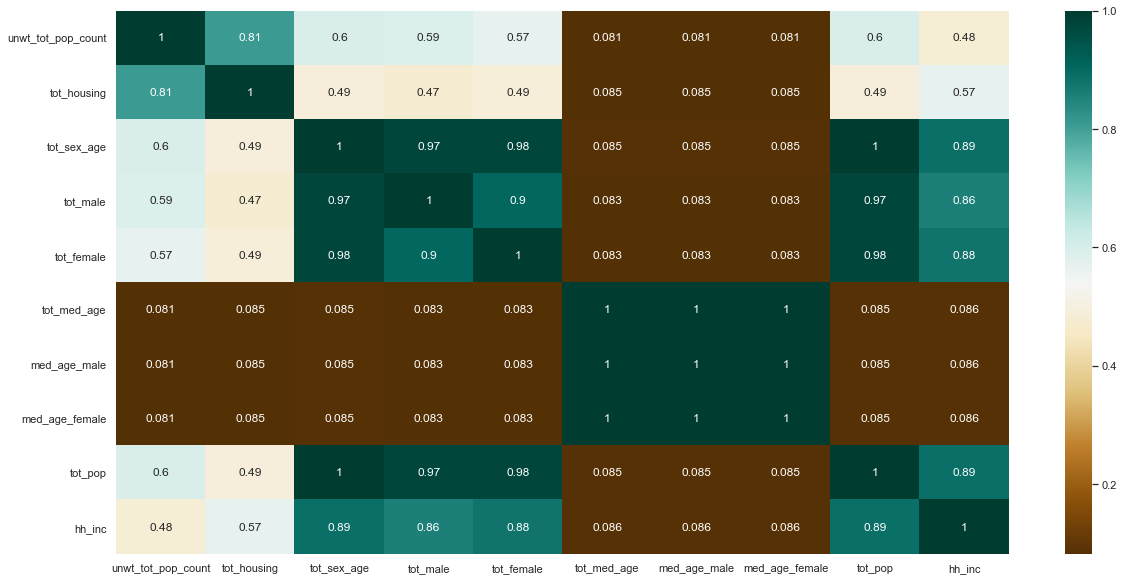

In [26]:
# Explore correlations between variables

plt.figure(figsize=(20,10))
c= acs.corr()
#Heatmap
sns.heatmap(c,cmap="BrBG",annot=True)
c

Not expecting any interesting correlations here based on the variables of interest. May want to incorporate other variables from the ACS educational attainment, etc. There are probably some resources on which variables are most useful. I would have to guess educational and income brackets, political affiliation, transportation and commuting related data.

In [27]:
acs.head()

,unwt_tot_pop_count,tot_housing,tot_sex_age,tot_male,tot_female,tot_med_age,med_age_male,med_age_female,tot_pop,hh_inc,blkgrp,tract,cnty
0,50.0,20.0,874,586,288,32.9,31.0,57.0,874,374,Block Group 1,Census Tract 16,Deschutes County
1,100.0,50.0,2271,1089,1182,33.5,28.1,36.8,2271,979,Block Group 2,Census Tract 16,Deschutes County
2,150.0,60.0,3118,1374,1744,40.5,42.3,37.8,3118,1269,Block Group 1,Census Tract 17,Deschutes County
3,100.0,50.0,2370,1201,1169,37.2,34.3,39.7,2370,1026,Block Group 2,Census Tract 17,Deschutes County
4,90.0,40.0,2228,952,1276,32.8,37.6,30.2,2228,790,Block Group 4,Census Tract 17,Deschutes County


In [28]:
# Start grouping by counties

#deschutes = acs.groupby('Name')  

grouped = acs.groupby('cnty')
grouped

In [29]:
grouped.groups

{' Deschutes County': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
             35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
             52, 53, 55, 56, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71,
             72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
            dtype='int64'),
 ' Lane County': Int64Index([318, 319, 320, 321, 322, 323, 324, 325, 326, 327,
             ...
             566, 567, 568, 569, 570, 571, 572, 573, 574, 575],
            dtype='int64', length=255),
 ' Marion County': Int64Index([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
             ...
             267, 268, 269, 270, 271, 272, 273, 274, 275, 276],
            dtype='int64', length=186),
 ' Multnomah County': Int64Index([ 576,  577,  578,  579,  580,  581,  582,  583,  584,  585,
             ...
             1087, 1088, 1089, 1090, 1091, 1092, 109

In [31]:
df.groupby('cnty').filter(
  lambda x: (x['tot_male']).sum()

SyntaxError: unexpected EOF while parsing (<ipython-input-31-c6aaf50205d1>, line 2)